In [1]:
%matplotlib inline

import os
# assumes jupyter server launched from root dir of repo
filepath = os.path.abspath(os.path.join(os.getcwd(), '..'))
%cd $filepath

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sys
sys.path.append(os.path.abspath(filepath))

from IPython.display import display

/Users/cyz/survey/active_survey


In [2]:
# Suppress verbose warnings about missing fonts
import warnings
warnings.simplefilter('ignore')

In [3]:
dataset_to_filepath = dict(
    cces12="data/cces/cces12_cs.csv",
    cces16="data/cces/cces16_cs.csv",
    cces16_full="data/cces/cces16_full_cs.csv",
    cces18="data/cces/cces18_cs.csv"
)

In [4]:
dataset_properties = []
dataset_to_col_sparsity = dict()
dataset_to_user_sparsity = dict()

for dataset, response_filename in dataset_to_filepath.items():
    responses = pd.read_csv(response_filename, index_col=0)
    n, k = responses.shape
    col_sparsity = responses.isnull().mean(axis=0)
    dataset_to_col_sparsity[dataset] = col_sparsity
    
    user_sparsity = responses.isnull().mean(axis=1)
    dataset_to_user_sparsity[dataset] = user_sparsity
    
    dataset_properties.append(dict(
        dataset=dataset,
        n=n,
        k=k,
        sparsity=col_sparsity.mean()
    ))

dataset_properties_pd = pd.DataFrame(dataset_properties).set_index('dataset')

In [5]:
display(dataset_properties_pd)

,k,n,sparsity
dataset,,,
cces12,29,54535,0.037164
cces16,38,64600,0.015576
cces16_full,61,64600,0.011932
cces18,42,60000,0.011637


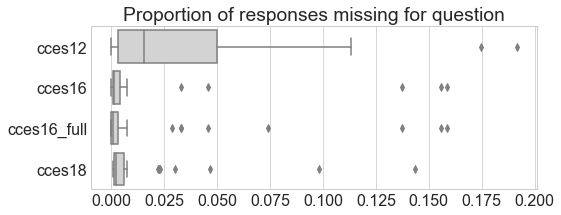

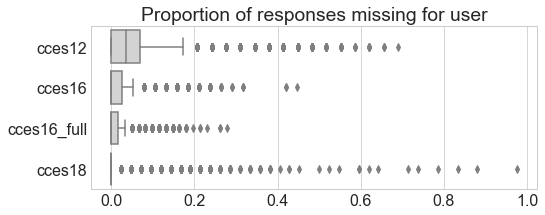

In [6]:
def plot_dataset_sparsity(dataset_to_sparsity, sparsity_entity):
    datasets, sparsity_list = zip(*dataset_to_sparsity.items())    
    
    sns.set_style("whitegrid")
    plt.rcParams["figure.figsize"] = (8, 3)
    plt.figure()
    ax = sns.boxplot(data=sparsity_list, orient='h', color='lightgray')
    ax.set(yticklabels=datasets)
    plt.title("Proportion of responses missing for {}".format(sparsity_entity))
    plt.show()

plt.rcParams.update({'font.size': 16})
plot_dataset_sparsity(dataset_to_col_sparsity, 'question')
plot_dataset_sparsity(dataset_to_user_sparsity, 'user')